In [191]:
import sklearn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('train_mdf.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [192]:
# Id 변수 삭제
data = data.drop('Id', axis = 1)


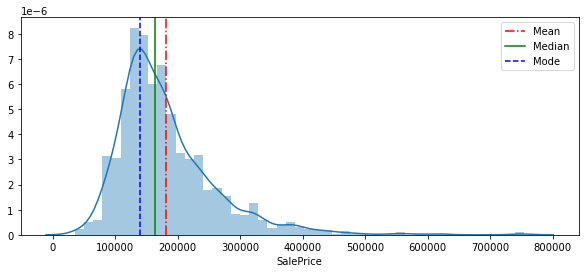

In [193]:
# 목표변수 SalePrice 분포 확인
plt.figure(figsize = (10,4))
sns.distplot(data.loc[:,'SalePrice'], norm_hist = True)
plt.axvline(x = data['SalePrice'].mean(), c = 'red', label='Mean', ls='-.')
plt.axvline(x = data['SalePrice'].median(), c = 'green', label='Median', ls='-')
plt.axvline(x = data['SalePrice'].mode()[0], c = 'blue', label='Mode', ls='--')
plt.legend()

In [194]:
# 목표 변수 왜도, 첨도 확인
print("Skewness : %f" % data['SalePrice'].skew())
print("Kurtosis : %f" % data['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

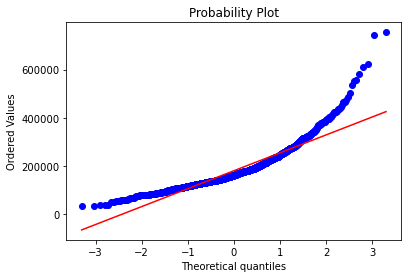

In [195]:
from scipy import stats
stats.probplot(data.loc[:,'SalePrice'], plot = plt)

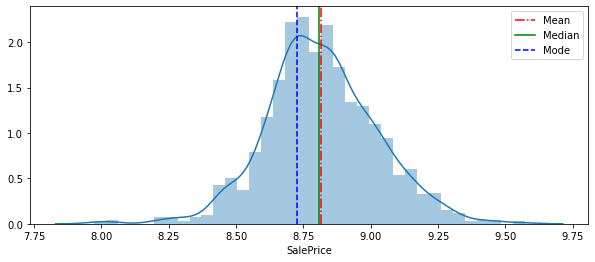

In [196]:
# Box-Cox transformation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

data['SalePrice'] = boxcox1p(data['SalePrice'], boxcox_normmax(data['SalePrice'] + 1))

plt.figure(figsize = (10,4))
sns.distplot(data.loc[:,'SalePrice'], norm_hist = True)
plt.axvline(x = data['SalePrice'].mean(), c = 'red', label='Mean', ls='-.')
plt.axvline(x = data['SalePrice'].median(), c = 'green', label='Median', ls='-')
plt.axvline(x = data['SalePrice'].mode()[0], c = 'blue', label='Mode', ls='--')
plt.legend()

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([7.97145984, 7.97807536, 8.01796713, ..., 9.4805101 , 9.56492733,
         9.57130309])),
 (0.20657678609181107, 8.816496172709966, 0.9955635030115915))

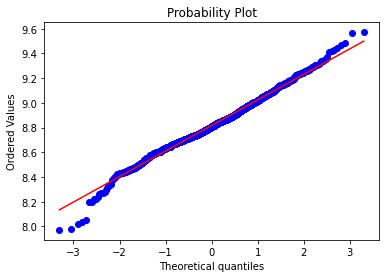

In [197]:
from scipy import stats
stats.probplot(data.loc[:,'SalePrice'], plot = plt)

In [198]:
# 목표 변수와의 상관관계 확인
correlation = data.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(12)
correlation

,SalePrice
SalePrice,1.000000
OverallQual,0.815731
GrLivArea,0.698207
GarageCars,0.680382
GarageArea,0.650055
TotalBsmtSF,0.610062
1stFlrSF,0.594578
FullBath,0.594296
YearBuilt,0.587668
YearRemodAdd,0.566566


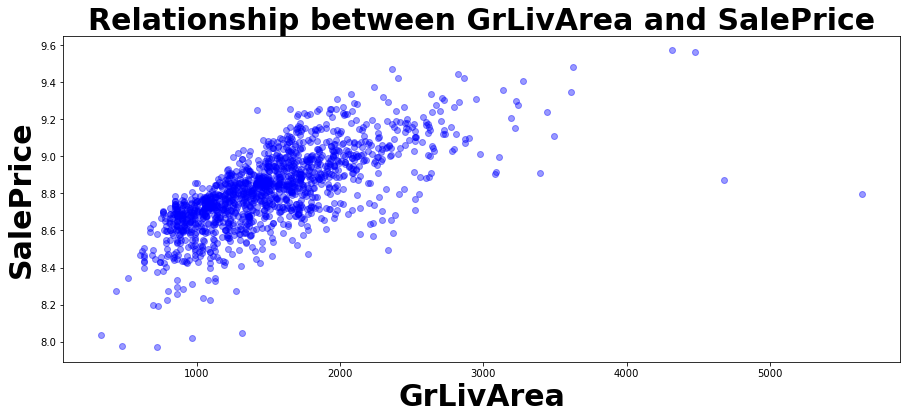

In [199]:
plt.figure(figsize=(15, 6))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = data, color = 'blue', alpha = 0.4) 
# the alpha blending value, between 0 (transparent) and 1 (opaque).
plt.title('Relationship between GrLivArea and SalePrice', weight = 'bold', fontsize = 30)
plt.xlabel('GrLivArea', weight = 'bold', fontsize = 30)
plt.ylabel('SalePrice', weight = 'bold', fontsize = 30)
plt.show()

In [200]:
# 아웃라이어 위치 확인
data[['SalePrice','GrLivArea']].sort_values(by = 'GrLivArea', ascending = False)

,SalePrice,GrLivArea
1298,8.797383,5642
523,8.871912,4676
1182,9.564927,4476
691,9.571303,4316
1169,9.480510,3627
...,...,...
528,8.468897,605
29,8.345705,520
916,7.978075,480
1100,8.273259,438


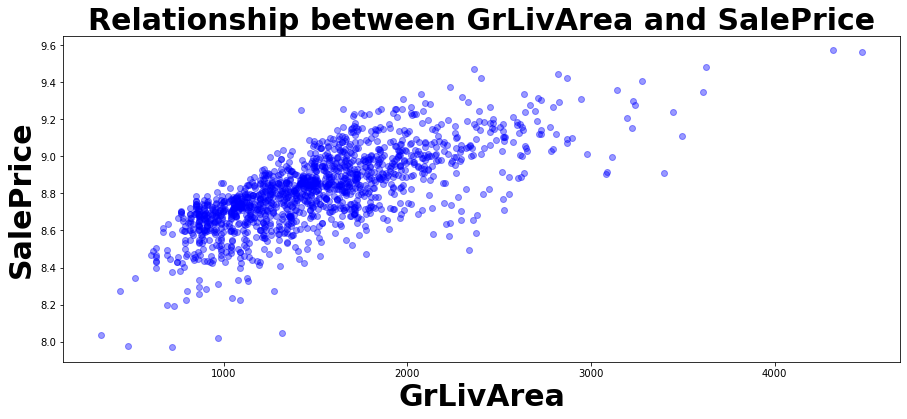

In [201]:
#아웃라이어 제거
data = data[data['GrLivArea']<4500] 
plt.figure(figsize=(15, 6))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = data, color = 'blue', alpha = 0.4) 
# the alpha blending value, between 0 (transparent) and 1 (opaque).
plt.title('Relationship between GrLivArea and SalePrice', weight = 'bold', fontsize = 30)
plt.xlabel('GrLivArea', weight = 'bold', fontsize = 30)
plt.ylabel('SalePrice', weight = 'bold', fontsize = 30)
plt.show()

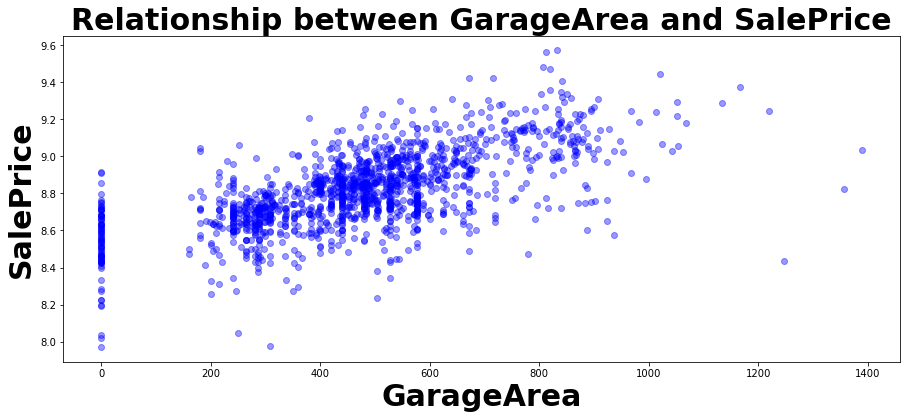

In [202]:
plt.figure(figsize=(15, 6))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = data, color = 'blue', alpha = 0.4) 
# the alpha blending value, between 0 (transparent) and 1 (opaque).
plt.title('Relationship between GarageArea and SalePrice', weight = 'bold', fontsize = 30)
plt.xlabel('GarageArea', weight = 'bold', fontsize = 30)
plt.ylabel('SalePrice', weight = 'bold', fontsize = 30)
plt.show()

In [203]:
# 아웃라이어 위치 확인
data[['SalePrice','GarageArea']].sort_values(by = 'GarageArea', ascending = False).head(10)

,SalePrice,GarageArea
581,9.033384,1390
1190,8.822730,1356
1061,8.436612,1248
825,9.243397,1220
178,9.373877,1166
664,9.289954,1134
1417,9.181550,1069
270,9.058184,1053
1228,9.220020,1052
1142,9.292130,1052


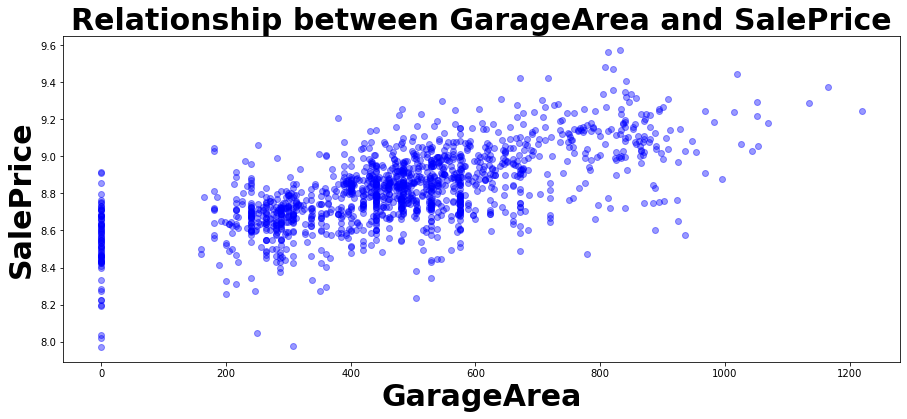

In [204]:
#아웃라이어 제거
data = data[data['GarageArea']<1240] 
plt.figure(figsize=(15, 6))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = data, color = 'blue', alpha = 0.4) 
# the alpha blending value, between 0 (transparent) and 1 (opaque).
plt.title('Relationship between GarageArea and SalePrice', weight = 'bold', fontsize = 30)
plt.xlabel('GarageArea', weight = 'bold', fontsize = 30)
plt.ylabel('SalePrice', weight = 'bold', fontsize = 30)
plt.show()

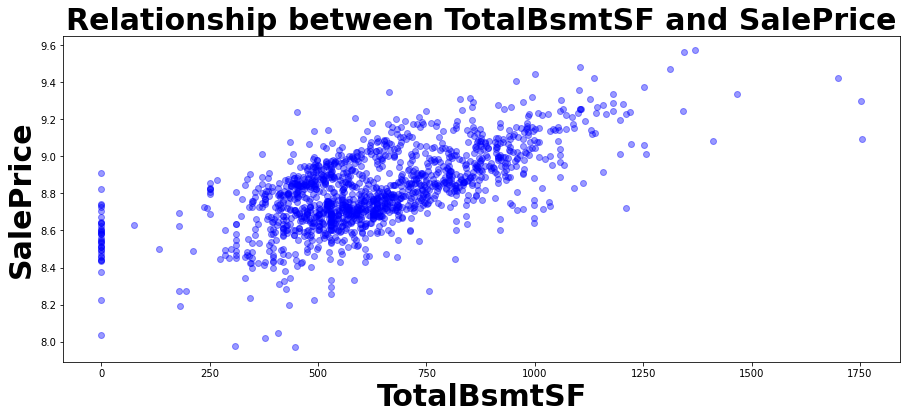

In [240]:
plt.figure(figsize=(15, 6))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = data, color = 'blue', alpha = 0.4) 
# the alpha blending value, between 0 (transparent) and 1 (opaque).
plt.title('Relationship between TotalBsmtSF and SalePrice', weight = 'bold', fontsize = 30)
plt.xlabel('TotalBsmtSF', weight = 'bold', fontsize = 30)
plt.ylabel('SalePrice', weight = 'bold', fontsize = 30)
plt.show()

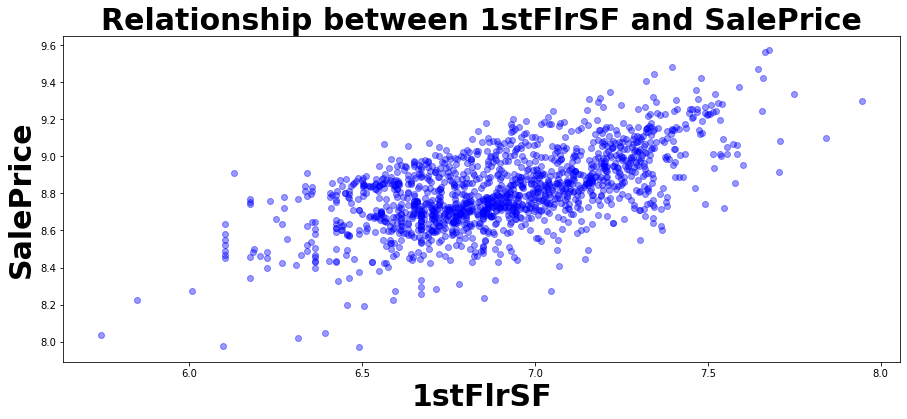

In [241]:
plt.figure(figsize=(15, 6))
plt.scatter(x = '1stFlrSF', y = 'SalePrice', data = data, color = 'blue', alpha = 0.4) 
# the alpha blending value, between 0 (transparent) and 1 (opaque).
plt.title('Relationship between 1stFlrSF and SalePrice', weight = 'bold', fontsize = 30)
plt.xlabel('1stFlrSF', weight = 'bold', fontsize = 30)
plt.ylabel('SalePrice', weight = 'bold', fontsize = 30)
plt.show()

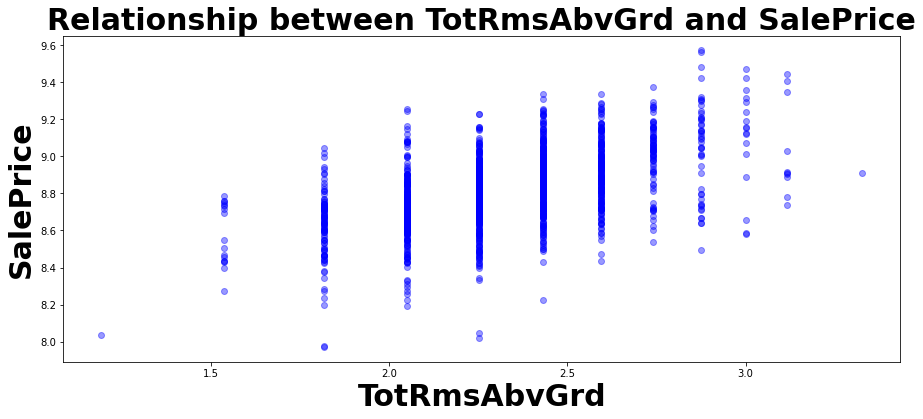

In [242]:
plt.figure(figsize=(15, 6))
plt.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', data = data, color = 'blue', alpha = 0.4) 
# the alpha blending value, between 0 (transparent) and 1 (opaque).
plt.title('Relationship between TotRmsAbvGrd and SalePrice', weight = 'bold', fontsize = 30)
plt.xlabel('TotRmsAbvGrd', weight = 'bold', fontsize = 30)
plt.ylabel('SalePrice', weight = 'bold', fontsize = 30)
plt.show()

In [208]:
# 독립 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1455 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1455 non-null   object 
 7   LandContour    1455 non-null   object 
 8   Utilities      1455 non-null   object 
 9   LotConfig      1455 non-null   object 
 10  LandSlope      1455 non-null   object 
 11  Neighborhood   1455 non-null   object 
 12  Condition1     1455 non-null   object 
 13  Condition2     1455 non-null   object 
 14  BldgType       1455 non-null   object 
 15  HouseStyle     1455 non-null   object 
 16  OverallQual    1455 non-null   int64  
 17  OverallCond    1455 non-null   int64  
 18  YearBuil

In [209]:
# MSSubClass는 범주형 변수이므로 문자형으로 변환 
data['MSSubClass'] = data['MSSubClass'].apply(str)

In [210]:
# 전체 데이터의 결측치 확인

# 데이터에서 각 변수의 결측치 수와 비율을 표로 작성
indices = data.isnull().sum().index
values = data.isnull().sum().values
percentages = []

for i in indices:
    percentages.append((data[i].isnull().sum()/ data[i].shape[0])*100)
d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
null_frame = pd.DataFrame(data = d)
null_frame.sort_values(by = 'Approximate Percentage of Null Values', ascending =False).head(19)

,Columns,Count of Null Values,Approximate Percentage of Null Values
71,PoolQC,1449,99.587629
73,MiscFeature,1402,96.357388
5,Alley,1364,93.745704
72,Fence,1174,80.687285
56,FireplaceQu,689,47.353952
2,LotFrontage,258,17.731959
58,GarageYrBlt,81,5.567010
63,GarageCond,81,5.567010
57,GarageType,81,5.567010
59,GarageFinish,81,5.567010


In [211]:
# 결측치 중 데이터의 결손을 나타내는 것이 아니라 없음이라는 정보를 나타내는 변수 처리 
data['BsmtQual']=data['BsmtQual'].replace({None:'No Basement'}) 
data['BsmtCond']=data['BsmtCond'].replace({None:'No Basement'}) 
data['BsmtExposure']=data['BsmtExposure'].replace({None:'No Basement'}) 
data['BsmtFinType1']=data['BsmtFinType1'].replace({None:'No Basement'}) 
data['BsmtFinType2']=data['BsmtFinType2'].replace({None:'No Basement'}) 
data['GarageFinish']=data['GarageFinish'].replace({None:'No Garage'})
data['GarageType']=data['GarageType'].replace({None:'No Garage'})
data['GarageQual']=data['GarageQual'].replace({None:'No Garage'})
data['GarageCond']=data['GarageCond'].replace({None:'No Garage'})
data['FireplaceQu']=data['FireplaceQu'].replace({None:'No Fireplace'})

 

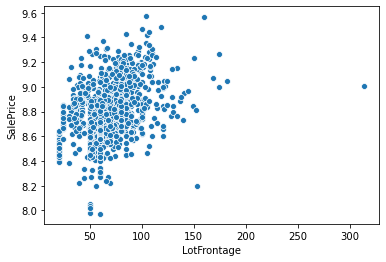

In [212]:
sns.scatterplot(data.loc[:,'LotFrontage'], data.loc[:,'SalePrice'])

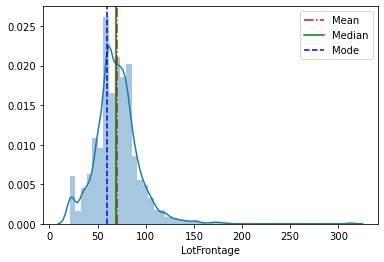

In [213]:
# LotFrontage의 분포 확인 
sns.distplot(data.loc[:,'LotFrontage'], norm_hist = True)
plt.axvline(x = data['LotFrontage'].mean(), c = 'red', label='Mean', ls='-.')
plt.axvline(x = data['LotFrontage'].median(), c = 'green', label='Median', ls='-')
plt.axvline(x = data['LotFrontage'].mode()[0], c = 'blue', label='Mode', ls='--')
plt.legend()

In [215]:
# data에서 범주형 변수의 결측치를 train의 최빈값으로 교체 
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0]) # 명목형
data['MasVnrType'] = data['MasVnrType'].fillna(train['MasVnrType'].mode()[0]) # 명목형, 최빈값: None



# data에서 수치형 변수의 결측치 처리
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0) # MasVnrType의 최빈값이 None이기 때문에 0으로 채움
# In order to fill the null values for LotFrontage(Linear feet of street connected to property)
# we will fill it with median of the values grouped by Neighborhood.[]
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))



In [216]:
# MasVnrType, MasVnrArea, GarageYrBlt, 
data['MasVnrType'].mode()


0    None
dtype: object

In [217]:
# 새로운 독립 변수 생성

# 해당 변수들은 유무에 따라 가격 차이가 많이 나기 때문에 변수를 바꿔줌
data['HasPool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['Has2ndFloor'] = data['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
data['HasGarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['HasBsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['HasFireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 다중공성선의 문제가 생길 수 있기 때문에 변수를 합침
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

# 같은 내용을 의미하므로 총합으로 계산
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'])

# 팔린연도 - Max(건축연도,리모델링연도) 로 팔린 시기가 얼마나 오래된 건물인지 확인할 수 있는 변수 설정 
data['YearsSinceRemodel'] = data['YrSold'].astype(int) - data['YearRemodAdd'].astype(int)


In [218]:
# 변수가 한개에 너무 편중 되어 있기때문에 삭제 
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [239]:
# 수치형 변수의 왜도
num_data = data.select_dtypes(exclude = 'object').columns

skewed_data = data[num_data].apply(lambda x : x.skew()).sort_values(ascending = False)
skew_data = pd.DataFrame({'Skew Value' : skewed_data})

skew_data.head(10)

,Skew Value
Exterior1st_CBlock,38.144462
HeatingQC_Po,38.144462
Condition2_PosA,38.144462
ExterCond_Po,38.144462
Exterior2nd_Other,38.144462
Exterior2nd_CBlock,38.144462
RoofMatl_Membran,38.144462
Functional_Sev,38.144462
Exterior1st_AsphShn,38.144462
Heating_Floor,38.144462


In [220]:
## 수치형 변수
numerical_columns = data.select_dtypes(exclude = 'object').columns

# 수치형 변수의 왜도 체크
skewed_data = data[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)

high_skew = skewed_data[abs(skewed_data) > 0.5] # 왜도가 0.5이상인 변수 선별
skewed_data = high_skew.index

# 타겟 변수와 마찬가지로 Box-Cox transformation 
for column in skewed_data:
    data[column] = boxcox1p(data[column], boxcox_normmax(data[column] + 1))

C:\Users\Jin\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Jin\anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [221]:
data = pd.get_dummies(data).reset_index(drop=True)
data.shape

(1455, 308)

In [222]:
from sklearn.model_selection import train_test_split
y = data['SalePrice'].reset_index(drop = True)
features = data.drop('SalePrice', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42)

In [232]:
#!pip install xgboost
import xgboost as xgb
xgb_regress = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
xgb_regress.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [234]:
predict= xgb_regress.predict(x_test)

In [235]:
from sklearn.metrics import r2_score
r2_score(predict, y_test)

0.8900141865099012